<a href="https://colab.research.google.com/github/WalinCodeDump/Public-Garbage-Code/blob/main/Dice_game_Bank_optimal_strategy_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code for Bank strategy tester

# Rules of Bank game:
## The game is played in a sequence of 10-20 rounds (Or any other number, but those are typical game lengths)
## Each round consists of rolling two dice, making decisions, then passing the dice to another player
## The first three rolls of a round are different from rolls made afterward
# Within a round:
## Start the round with a total of 0.
## Roll two dice and calculate their sum. Add this sum to the total, unless:
### The roll was during the first three rolls, and the sum was 7. In which case add 70 to the total.
### The roll was not during the first three rolls, and the sum was 7. In which case the round ends, resetting the total to 0.
### The roll was not during the first three rolls, and the dice values were equal (a "doubles" roll). In which case the total doubles.

# Before any roll, any player at the table can "bank" the total, adding the current total to their own personal score.
# By doing this, they give up any chance to bank the total later, and cannot roll for the remainder of the round.

# Common strategies include waiting for the total to pass 200 before banking, or waiting for 10 rolls to pass before banking.
# This program intends to test, over several games of Bank, which strategy results in a higher score.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def roll():
  r1 = np.random.randint(1,high=7)
  r2 = np.random.randint(1,high=7)
  dubs = (r1 == r2)
  return r1 + r2, dubs

In [40]:
class bankPlayer:
  val = 0 # Holds the player's score
  strat = 'None' # Holds the player's strategy
  bank_threshold = 0; # Value that has to be surpassed in order to bank.
  def __init__(self,strat,threshold):
    self.val = 0;
    self.strat = strat;
    self.bank_threshold = threshold;

  def bank(self, score):
    self.val += score

  def threshold_check(self,score,turn,dubs_num):
    end_turn = False;
    if self.strat == 'ScoreThreshold': # If the score in the round reaches a certain point, bank.
      if (score >= self.bank_threshold):
        self.bank(score);
        end_turn = True;
    if self.strat == 'TurnThreshold': # If the number of turns in the round reaches a certain point, bank.
      if (turn >= self.bank_threshold):
        self.bank(score);
        end_turn = True;
    if self.strat == 'DoubleThreshold': # If the number of doubles in the round reaches a certain point, bank.
      if (dubs_num >= self.bank_threshold):
        self.bank(score);
        end_turn = True;
    return end_turn

In [81]:
def playgame(strategy,threshold,numrounds = 20,statements = False,suppress = False):
  # Play as many rounds as "numrounds" is. Output the score of the player (unless "suppress" is true).
  # Set player up with "strategy" and "threshold" values.
  # If "statements" is true, then print at the end of each round or bank.
  ## Make a loop
  player = bankPlayer(strategy,threshold);
  for n in range(numrounds): # Run all rounds through
    # Initialize holders
    running_score = 0;
    roll_holder = (0,False); # Dummy values for roll holder
    turn_holder = 0;
    for n in range(3):
      turn_holder += 1;
      roll_holder = roll();
      if (roll_holder[0] == 7):
        running_score += 70;
      else:
        running_score += roll_holder[0];

    # Do-while loop to roll until a 7 is reached
    ## Check before the turn starts
    end_round = player.threshold_check(score = running_score, turn = turn_holder, dubs_num = 0);
    if end_round == True:
      if (statements == True):
        print('Round end (before 4th turn, just ended safety turns)! Score of round: ', running_score, 'Turns played: 3', ' ... Bank: ', player.val)
      continue;
    ## Do one roll before entering the while-loop; initialize double-rolls holder
    turn_holder += 1;
    roll_holder = roll();
    dubs_holder = 0;
    if (roll_holder[0] == 7):
      if (statements == True):
        print('Round end (value of 7 rolled)! Score of round: ', f'{running_score:5}','Turns played: ', f'{turn_holder:>3}')
      continue;
    ## While loop. Keeps rolling until playert's strategy threshold is reached.
    while (roll_holder[0] != 7):
      if (roll_holder[1] == True): # Double is rolled
        running_score *= 2;
        dubs_holder += 1;
      else:
        running_score += roll_holder[0];

      end_round = player.threshold_check(score = running_score, turn = turn_holder, dubs_num = dubs_holder);
      if (end_round == True):
        if (statements == True):
          print('Round end (threshold reached)! Score of round: ', f'{running_score:5}','Turns played: ', f'{turn_holder:>3}', ' ... Bank: ', player.val)
        # Break from while loop. Since the while loop is the last statement of
        # the round, the round then ends there with no need for a continue statement.
        break; # Breaks from while loop.

      turn_holder += 1;
      roll_holder = roll();
      if (roll_holder[0] == 7):
        if (statements == True):
          print('Round end (value of 7 rolled)! Score of round: ', f'{running_score:5}','Turns played: ', f'{turn_holder:>3}')
        # No need for break statement. While loop will end naturally.
  if (suppress == False):
    print('Game end! Player score: ', player.val)
  return player.val


In [82]:
playgame(strategy = 'ScoreThreshold',threshold = 200)

Game end! Player score:  730


730

In [195]:
# Now, check the overall trend for each player strategy.
# I think it'd be best to take the average of 20 games per threshold, and plot against thresholds.
def plotStrategy(player_strategy, lower_bound, higher_bound, step_size, num_games = 20,rounds_per_game = 20):
  num_tholds = int(np.floor((higher_bound - lower_bound)/step_size) + 1)
  if (step_size == 1):
    num_tholds -= 1;
  toplot = np.zeros((num_tholds,2))
  ind = 0
  for curr_threshold in range(lower_bound, higher_bound, step_size):
    tmp_scores = np.array([]);
    for n in range(num_games):
      tmp_scores = np.append(tmp_scores,playgame(strategy = player_strategy, threshold = curr_threshold, numrounds = rounds_per_game,suppress = True))
    x_toplot = curr_threshold
    y_toplot = np.mean(tmp_scores)
    toplot[ind] = (x_toplot, y_toplot)

    # Increment index
    ind += 1
  plt.plot(toplot[:,0],toplot[:,1])
  plt.title(f'Total score for strategy "{player_strategy}" in {num_games} games')

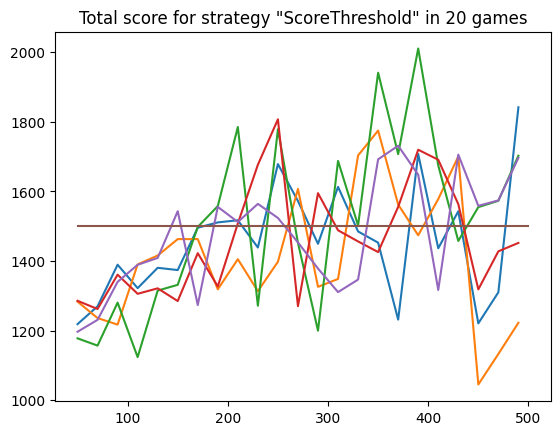

In [188]:
lb = 50; hb = 500 # Bounds for the current strategy
for n in range(5):
  plotStrategy(player_strategy = 'ScoreThreshold', lower_bound = 50, higher_bound = 500, step_size = 20,num_games = 20)

favorite_score = 1500 # This seems like a good benchmark, since it's a pretty normal score to get
checkline_x = np.linspace(lb, hb)
checkline_y = np.full_like(checkline_x,favorite_score)
plt.plot(checkline_x,checkline_y)

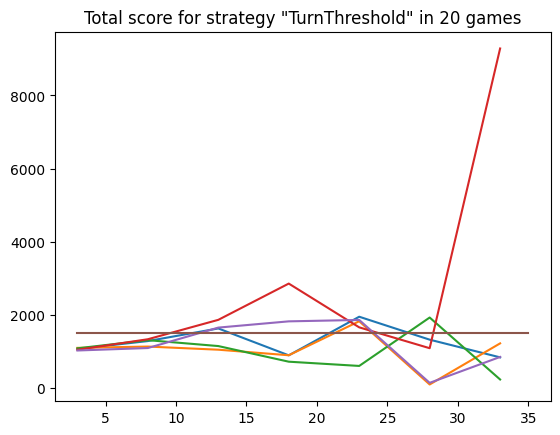

In [198]:
lb = 3; hb = 35 # Bounds for the current strategy
for n in range(5):
  plotStrategy(player_strategy = 'TurnThreshold', lower_bound = lb, higher_bound = hb, step_size = 5,num_games = 20)

favorite_score = 1500 # This seems like a good benchmark, since it's a pretty normal score to get
checkline_x = np.linspace(lb,hb)
checkline_y = np.full_like(checkline_x,favorite_score)
plt.plot(checkline_x,checkline_y)

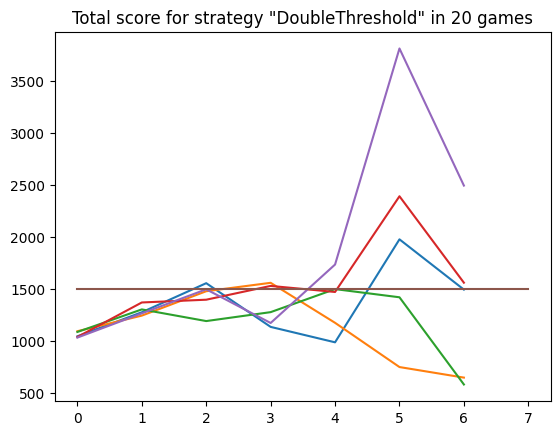

In [197]:
lb = 0; hb = 7 # Bounds for the current strategy
for n in range(5):
  plotStrategy(player_strategy = 'DoubleThreshold', lower_bound = 0, higher_bound = 7, step_size = 1,num_games = 20)

favorite_score = 1500 # This seems like a good benchmark, since it's a pretty normal score to get
checkline_x = np.linspace(lb,hb)
checkline_y = np.full_like(checkline_x,favorite_score)
plt.plot(checkline_x,checkline_y)